In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy

## PRIMA OUTLIER DETECTION E POI IMPUTATION

In [2]:
path = "../Risultati/Air_Quality/rf_regression_mix_outliers_none.csv"
df_o_n = pd.read_csv(path)
df_o_n.head()
df_o_n.reset_index(drop=True)
df_o_n['percentage'] = 100 - df_o_n['percentage']


In [3]:
print(df_o_n)

     percentage  outlier     imputation        r2
0           100     none           none  0.963025
1            90     none           none  0.948634
2            90        z           drop  0.952443
3            90        z           LOCF  0.950700
4            90        z           mean  0.937339
..          ...      ...            ...       ...
675          50  iforest  interpolation  0.871317
676          50      hst           drop  0.911681
677          50      hst           LOCF  0.906425
678          50      hst           mean  0.836559
679          50      hst  interpolation  0.901689

[680 rows x 4 columns]


In [4]:
df_o_n_neg = df_o_n[df_o_n['r2']<0]
df_o_n_neg

,percentage,outlier,imputation,r2


In [5]:
df_o_n.loc[df_o_n['r2'] < 0, 'r2'] = 0

In [6]:
df_o_n

,percentage,outlier,imputation,r2
0,100,none,none,0.963025
1,90,none,none,0.948634
2,90,z,drop,0.952443
3,90,z,LOCF,0.950700
4,90,z,mean,0.937339
...,...,...,...,...
675,50,iforest,interpolation,0.871317
676,50,hst,drop,0.911681
677,50,hst,LOCF,0.906425
678,50,hst,mean,0.836559


In [7]:
df_o_n_grouped = df_o_n.groupby(['outlier','imputation']).mean().sort_values(by='r2', ascending=False)
print(df_o_n_grouped)

                       percentage        r2
outlier imputation                         
lof     drop            70.000000  0.958217
        LOCF            70.000000  0.946615
        interpolation   70.000000  0.943842
z       LOCF            70.000000  0.941817
        interpolation   70.000000  0.941743
iforest drop            70.000000  0.934737
z       drop            70.000000  0.934676
none    none            70.731707  0.934545
hst     drop            70.000000  0.932856
z       mean            70.256410  0.920740
hst     LOCF            70.000000  0.919610
        interpolation   70.000000  0.916609
        mean            70.000000  0.884119
iforest interpolation   70.000000  0.846245
        LOCF            70.000000  0.842597
lof     mean            70.000000  0.819784
iforest mean            70.000000  0.651964


In [8]:
df_o_n_none = df_o_n[(df_o_n['outlier'] == 'none')].groupby(['percentage']).mean(numeric_only=True).reset_index()
df_o_n_none

,percentage,r2
0,50,0.922119
1,60,0.926427
2,70,0.932173
3,80,0.939587
4,90,0.948861
5,100,0.963025


In [9]:
df_o_n_lof_LOCF = df_o_n[(df_o_n['outlier'] == 'lof') & (df_o_n['imputation']=='LOCF')].groupby(['percentage']).mean(numeric_only=True).reset_index()
df_o_n_lof_LOCF

,percentage,r2
0,50,0.941752
1,60,0.943431
2,70,0.946627
3,80,0.949290
4,90,0.951977


In [10]:
df_o_n_lof_drop = df_o_n[(df_o_n['outlier'] == 'lof') & (df_o_n['imputation']=='drop')].groupby(['percentage']).mean(numeric_only=True).reset_index()
df_o_n_lof_drop

,percentage,r2
0,50,0.951669
1,60,0.955647
2,70,0.959116
3,80,0.961511
4,90,0.963141


In [11]:
df_o_n_lof_int = df_o_n[(df_o_n['outlier'] == 'lof') & (df_o_n['imputation']=='interpolation')].groupby(['percentage']).mean(numeric_only=True).reset_index()
df_o_n_lof_int

,percentage,r2
0,50,0.939145
1,60,0.940344
2,70,0.943662
3,80,0.946671
4,90,0.949391


In [12]:
df_o_n_if_drop = df_o_n[(df_o_n['outlier'] == 'iforest') & (df_o_n['imputation']=='drop')].groupby(['percentage']).mean(numeric_only=True).reset_index()
df_o_n_if_drop

,percentage,r2
0,50,0.923061
1,60,0.933515
2,70,0.937137
3,80,0.939052
4,90,0.940919


In [13]:
df_o_n_if_locf = df_o_n[(df_o_n['outlier'] == 'iforest') & (df_o_n['imputation']=='LOCF')].groupby(['percentage']).mean(numeric_only=True).reset_index()
df_o_n_if_locf

,percentage,r2
0,50,0.882126
1,60,0.867377
2,70,0.846295
3,80,0.821680
4,90,0.795507


In [14]:
df_o_n_if_locf_all = df_o_n[(df_o_n['outlier'] == 'iforest') & (df_o_n['imputation']=='LOCF')]
df_o_n_if_locf_all

,percentage,outlier,imputation,r2
11,90,iforest,LOCF,0.806527
28,80,iforest,LOCF,0.825344
45,70,iforest,LOCF,0.838464
61,60,iforest,LOCF,0.869252
78,50,iforest,LOCF,0.880078
95,90,iforest,LOCF,0.799327
112,80,iforest,LOCF,0.828187
129,70,iforest,LOCF,0.855067
146,60,iforest,LOCF,0.879116
163,50,iforest,LOCF,0.886682


In [15]:
df_o_n_z_locf = df_o_n[(df_o_n['outlier'] == 'z') & (df_o_n['imputation']=='LOCF')].groupby(['percentage']).mean(numeric_only=True).reset_index()
df_o_n_z_locf

,percentage,r2
0,50,0.933403
1,60,0.936501
2,70,0.940265
3,80,0.946484
4,90,0.952433


[]

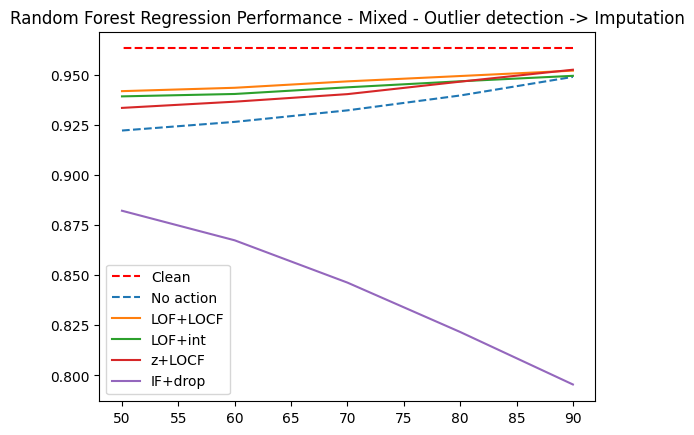

In [16]:
perc = [90,80,70,60,50]
plt.plot(perc, [df_o_n_none['r2'].iloc[-1]]*len(perc), 'r--', label='Clean')
plt.plot(df_o_n_none['percentage'].iloc[:-1],df_o_n_none['r2'].iloc[:-1], '--', label='No action')
#plt.plot(df_o_n_lof_drop['percentage'],df_o_n_lof_drop['r2'],label='LOF+drop')
plt.plot(df_o_n_lof_LOCF['percentage'],df_o_n_lof_LOCF['r2'], label='LOF+LOCF')
plt.plot(df_o_n_lof_int['percentage'],df_o_n_lof_int['r2'], label='LOF+int')
plt.plot(df_o_n_z_locf['percentage'],df_o_n_z_locf['r2'], label='z+LOCF')
plt.plot(df_o_n_if_locf['percentage'],df_o_n_if_locf['r2'], label='IF+drop')
plt.title("Random Forest Regression Performance - Mixed - Outlier detection -> Imputation")
plt.legend()
plt.plot()

## PRIMA DATA IMPUTATION POI OUTLIER DETECTION E REGRESSIONE FATTA CON NAN_TO_NUM

In [17]:
path = "../Risultati/Air_Quality/rf_regression_mix_none_outliers.csv"
df_n_o = pd.read_csv(path)
df_n_o.head()
df_n_o.reset_index(drop=True)
df_n_o['percentage'] = 100 - df_n_o['percentage']

In [18]:
df_n_o

,percentage,outlier,imputation,r2
0,100,none,none,0.963025
1,90,none,none,0.948634
2,90,z,drop,0.951829
3,90,lof,drop,0.948969
4,90,iforest,drop,0.795932
...,...,...,...,...
81,50,hst,mean,0.553265
82,50,z,interpolation,0.883889
83,50,lof,interpolation,0.696371
84,50,iforest,interpolation,0.385616


In [19]:
df_n_o_neg = df_n_o[df_n_o['r2']<0]
df_n_o_neg

,percentage,outlier,imputation,r2


In [20]:
df_n_o.loc[df_n_o['r2'] < 0, 'r2'] = 0

In [21]:
df_n_o_grouped = df_n_o.groupby(['outlier','imputation']).mean().sort_values(by='r2', ascending=False)
print(df_n_o_grouped)

                       percentage        r2
outlier imputation                         
none    none                 75.0  0.939178
z       drop                 70.0  0.935696
hst     drop                 70.0  0.932023
lof     drop                 70.0  0.929786
z       LOCF                 70.0  0.904862
        mean                 70.0  0.904832
        interpolation        70.0  0.904800
iforest drop                 70.0  0.804712
lof     LOCF                 70.0  0.778756
        mean                 70.0  0.778730
        interpolation        70.0  0.778727
hst     mean                 70.0  0.653152
        LOCF                 70.0  0.653041
        interpolation        70.0  0.652995
iforest interpolation        70.0  0.328342
        LOCF                 70.0  0.328237
        mean                 70.0  0.328200


In [22]:
df_n_o_none = df_n_o[(df_n_o['outlier'] == 'none')].groupby(['percentage']).mean(numeric_only=True).reset_index()
df_n_o_none

,percentage,r2
0,50,0.922930
1,60,0.927498
2,70,0.932664
3,80,0.940316
4,90,0.948634
5,100,0.963025


In [23]:
df_n_o_lof_drop = df_n_o[(df_n_o['outlier'] == 'lof') & (df_n_o['imputation']=='drop')].groupby(['percentage']).mean(numeric_only=True).reset_index()
df_n_o_lof_drop

,percentage,r2
0,50,0.912755
1,60,0.922496
2,70,0.928240
3,80,0.936471
4,90,0.948969


In [24]:
df_n_o_lof_LOCF = df_n_o[(df_n_o['outlier']=='lof') & (df_n_o['imputation']=='LOCF')].groupby(['percentage']).mean(numeric_only=True).reset_index()
df_n_o_lof_LOCF

,percentage,r2
0,50,0.696219
1,60,0.730625
2,70,0.776377
3,80,0.820818
4,90,0.869739


In [25]:
df_n_o_z_LOCF = df_n_o[(df_n_o['outlier']=='z') & (df_n_o['imputation']=='LOCF')].groupby(['percentage']).mean(numeric_only=True).reset_index()
df_n_o_z_LOCF

,percentage,r2
0,50,0.883770
1,60,0.892669
2,70,0.901890
3,80,0.914461
4,90,0.931519


[]

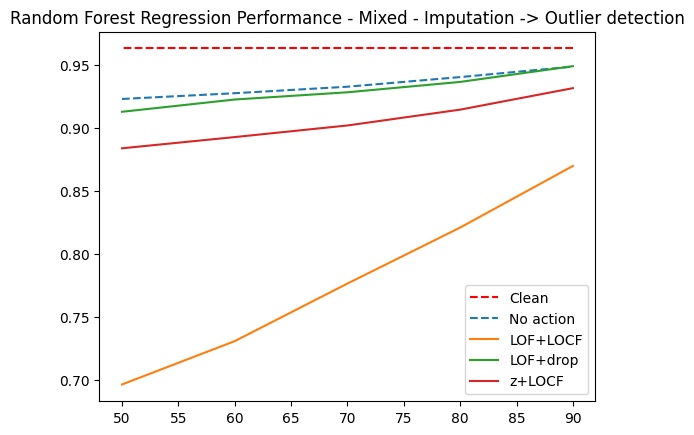

In [26]:
perc = [90,80,70,60,50]
plt.plot(perc, [df_n_o_none['r2'].iloc[-1]]*len(perc), 'r--', label='Clean')
plt.plot(df_n_o_none['percentage'].iloc[:-1],df_n_o_none['r2'].iloc[:-1], '--', label='No action')
plt.plot(df_n_o_lof_LOCF['percentage'],df_n_o_lof_LOCF['r2'], label='LOF+LOCF')
plt.plot(df_n_o_lof_drop['percentage'],df_n_o_lof_drop['r2'], label='LOF+drop')
plt.plot(df_n_o_z_LOCF['percentage'],df_n_o_z_LOCF['r2'], label='z+LOCF')
#plt.plot(df_n_o_if_locf['percentage'],df_n_o_if_locf['r2'], label='IF+locf')
plt.title("Random Forest Regression Performance - Mixed - Imputation -> Outlier detection")
plt.legend()
plt.plot()

### confronto tra i due metodi
#### lof + drop

[]

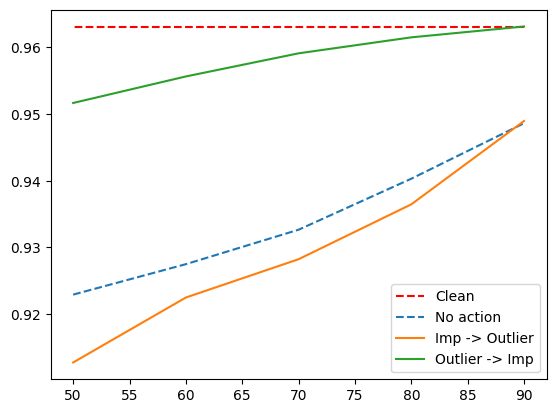

In [27]:
plt.plot(perc, [df_n_o_none['r2'].iloc[-1]]*len(perc), 'r--', label='Clean')
plt.plot(df_n_o_none['percentage'].iloc[:-1],df_n_o_none['r2'].iloc[:-1], '--', label='No action')
plt.plot(df_n_o_lof_drop['percentage'],df_n_o_lof_drop['r2'], label ='Imp -> Outlier')
plt.plot(df_o_n_lof_drop['percentage'],df_o_n_lof_drop['r2'], label ='Outlier -> Imp')
plt.legend()
plt.plot()

#### lof + LOCF

[]

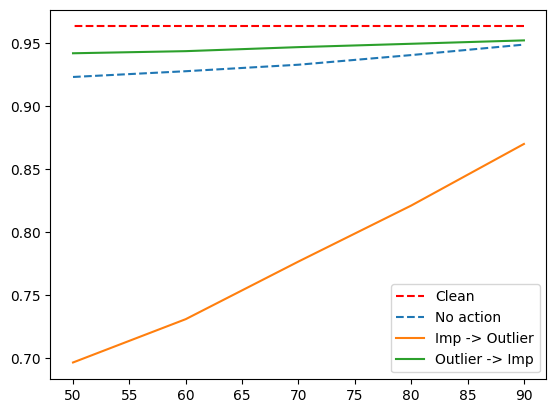

In [28]:
plt.plot(perc, [df_n_o_none['r2'].iloc[-1]]*len(perc), 'r--', label='Clean')
plt.plot(df_n_o_none['percentage'].iloc[:-1],df_n_o_none['r2'].iloc[:-1], '--', label='No action')
plt.plot(df_n_o_lof_LOCF['percentage'],df_n_o_lof_LOCF['r2'], label ='Imp -> Outlier')
plt.plot(df_o_n_lof_LOCF['percentage'],df_o_n_lof_LOCF['r2'], label ='Outlier -> Imp')
plt.legend()
plt.plot()

#### Z + LOCF

[]

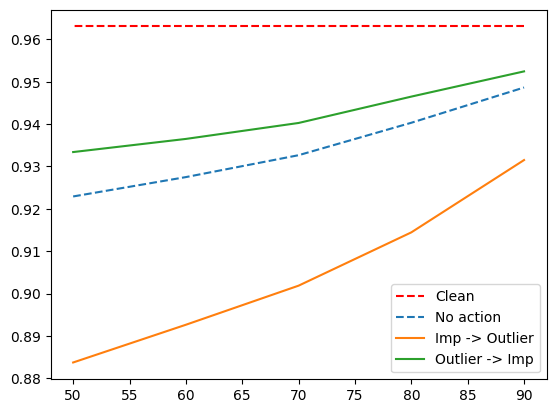

In [29]:
plt.plot(perc, [df_n_o_none['r2'].iloc[-1]]*len(perc), 'r--', label='Clean')
plt.plot(df_n_o_none['percentage'].iloc[:-1],df_n_o_none['r2'].iloc[:-1], '--', label='No action')
plt.plot(df_n_o_z_LOCF['percentage'],df_n_o_z_LOCF['r2'], label ='Imp -> Outlier')
plt.plot(df_o_n_z_locf['percentage'],df_o_n_z_locf['r2'], label ='Outlier -> Imp')
plt.legend()
plt.plot()

#### Classification

In [30]:
path = "../Risultati/Occupancy_Detection/rf_classification_mix_outliers_none.csv"
df_c = pd.read_csv(path)
df_c.head()
df_c.reset_index(drop=True)
df_c['percentage'] = 100 - df_c['percentage']

In [31]:
df_c

,percentage,outlier,imputation,r2
0,100,none,none,0.996769
1,90,none,none,0.996769
2,90,z,drop,1.000000
3,90,z,LOCF,0.953756
4,90,z,mean,0.977585
...,...,...,...,...
659,50,iforest,interpolation,0.995860
660,50,hst,drop,0.997658
661,50,hst,LOCF,0.992023
662,50,hst,mean,0.994346


In [32]:
df_c_grouped = df_c.groupby(['outlier','imputation']).mean().sort_values(by='r2', ascending=False)
print(df_c_grouped)

                       percentage        r2
outlier imputation                         
z       drop             69.74359  0.998239
lof     drop             69.74359  0.997831
iforest drop             69.74359  0.997653
hst     drop             69.74359  0.997634
none    none             70.50000  0.996701
lof     interpolation    69.74359  0.996645
        LOCF             69.74359  0.996205
hst     mean             69.74359  0.995770
z       mean             69.74359  0.992730
        interpolation    69.74359  0.992642
iforest mean             69.74359  0.992306
z       LOCF             69.74359  0.992140
lof     mean             69.74359  0.991291
iforest LOCF             69.74359  0.988818
hst     interpolation    69.74359  0.988787
iforest interpolation    69.74359  0.988179
hst     LOCF             69.74359  0.987529


In [33]:
df_c_none = df_c[(df_c['imputation'] == 'none')].groupby(['percentage']).mean(numeric_only=True).reset_index()
df_c_none

,percentage,r2
0,50,0.996681
1,60,0.996592
2,70,0.996618
3,80,0.996654
4,90,0.996946
5,100,0.996769


In [34]:
df_c_z_drop = df_c[(df_c['outlier'] == 'z') & (df_c['imputation']=='drop')].groupby(['percentage']).mean(numeric_only=True).reset_index()
df_c_z_drop

,percentage,r2
0,50,0.997650
1,60,0.997783
2,70,0.998339
3,80,0.998532
4,90,0.998927


In [35]:
df_c_lof_int = df_c[(df_c['outlier'] == 'lof') & (df_c['imputation']=='interpolation')].groupby(['percentage']).mean(numeric_only=True).reset_index()
df_c_lof_int

,percentage,r2
0,50,0.996441
1,60,0.996744
2,70,0.996870
3,80,0.996596
4,90,0.996567


In [36]:
df_c_lof_locf = df_c[(df_c['outlier'] == 'lof') & (df_c['imputation']=='LOCF')].groupby(['percentage']).mean(numeric_only=True).reset_index()
df_c_lof_locf

,percentage,r2
0,50,0.996277
1,60,0.996176
2,70,0.995974
3,80,0.996235
4,90,0.996365


[]

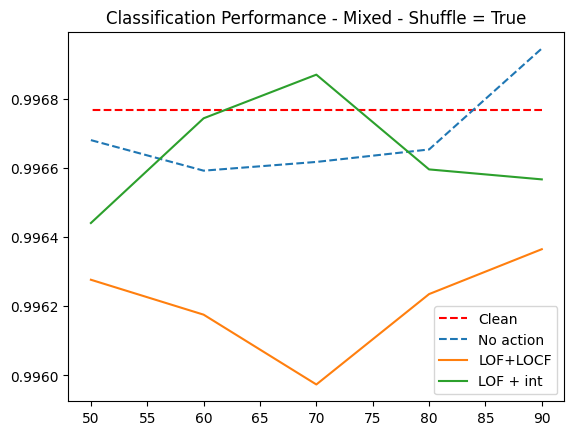

In [37]:
perc = [90,80,70,60,50]
plt.plot(perc, [df_c_none['r2'].iloc[-1]]*len(perc), 'r--', label='Clean')
plt.plot(df_c_none['percentage'].iloc[:-1],df_c_none['r2'].iloc[:-1], '--', label='No action')
plt.plot(df_c_lof_locf['percentage'],df_c_lof_locf['r2'], label='LOF+LOCF')
#plt.plot(df_c_z_drop['percentage'],df_c_z_drop['r2'], label='z+drop')
plt.plot(df_c_lof_int['percentage'],df_c_lof_int['r2'], label='LOF + int')
plt.title("Classification Performance - Mixed - Shuffle = True")
plt.legend()
plt.plot()